## SaaS Sales and marketing Analysis
JCDS 2702 - Verrell Elektranto (branch BSD)

## BACKGROUND :
- SaaS that stands for Software as a Service is a businesses that operate differently from traditional companies, relying on recurring subscriptions rather than one time purchases. As digital adoption grows, SaaS companies must not only attract customers but also retain them to ensure long-term revenue. Sales analysis in this context extends beyond initial transactions. it reflects retention rates, customer engagement, and overall subscription health.

- Profitability in SaaS presents its own challenges, with high upfront costs in product development and marketing. Many companies face slim margins during early growth stages, making it essential to monitor metrics like Customer Acquisition Cost (CAC) and Customer Lifetime Value (CLV). Profit analysis highlights operational efficiency, helping identify whether the business can scale sustainably and maintain financial health over time

- By analyzing sales and profit data, SaaS companies can pinpoint what’s working, spot risks early, and identify opportunities to grow. It turns raw numbers into powerful insights and those insights can help build stronger products, smarter campaigns, and more loyal customers.


## PROBLEM STATEMENTS:
 1. Which customer segments generate the highest sales across different regions and subregions?
 2. Which regions and subregions contribute most to total sales across different customer segments?
 3. Which industries and segments are most sensitive to discounts, based on changes in sales and quantity?
 4. Which customer segments receive the highest average discounts, and do they correspond to higher or lower sales volumes?
 5. Is there a correlation between discount rates and sales volume across cities or industries?
 6. Do certain industries show stronger performance in specific subregions?

## Data Understanding


In [1]:
# Import library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv('SaaS-Sales.csv')

# Dusplaying head
"""To display Top of the table"""
df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [2]:
# Displaying tail
""""To Display the bottom of table"""

df.tail()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [3]:
print(f'The number of rows and columns in the dataset {df.shape}')
df.info()

The number of rows and columns in the dataset (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      

### Variables name :
 1. Row ID,  Just a simple number that keeps track of each row in the dataset, like an internal name tag. (unique identifier for each row of data.)
 2. Order ID, A unique code assigned to every customer order, so we can group items from the same transaction.
 3. Order date, The actual date when the customer placed their order.
 4. Date key, A technical version of the date, often used to link up with time-based tables (like for dashboards).
 5. Contact Name, The person we’re doing business with or could be the buyer, account manager, or whoever’s listed on the order.
 6. City, The city where the customer is located or where the order was made.
 7. Region, A broader area that includes several cities; good for zoomed-out sales analysis.
 8. Subregion, A more specific area inside the region; helpful when we need to go hyper-local with insights.
 9. Customer, The company or person making the purchase.
 10. Customer ID, A unique identifier assigned to each customer so we can keep their records organized.
 11. Industry , - The line of business the customer is in. like healthcare, finance, or tech.
 12. Segment – A classification that helps us understand the customer type. maybe a startup, enterprise, or government.
 13. Product – The item that was sold. could be software, hardware, or a service.
 14. License – What kind of permission or subscription the customer bought (trial, annual, perpetual, etc.).
 15.  Sales – The total value of the purchase. how much money it brought in.
 16.  Quantity – The number of units the customer ordered.
 17.  Discount – The price reduction offered. either a percent or a fixed amount. 
 18.  Profit – What’s left after costs. your actual earnings from the sale.




In [4]:
# Descriptive statistic in numeric
"""To Display statisc in numeric summary"""

print("\nStatistic Summary:")
print(df.describe())


Statistic Summary:
            Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  839

In [5]:
# Data Dimention
"""To Display how many dataset contains"""

rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} Columns.\n")


Dataset contains 9994 rows and 19 Columns.




## Data Cleaning



In [20]:
# Delete some columns
df.drop(['row_id', 'order_id', 'date_key', 'contact_name', 'customer_id', 'product', 'license'], axis=1, inplace=True, errors= 'ignore')
df

,order_date,country,city,region,subregion,customer,industry,segment,sales,quantity,discount,profit,location
0,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,261.9600,2,0.00,41.9136,EMEA - UKIR
1,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,731.9400,3,0.00,219.5820,EMEA - UKIR
2,6/13/2022,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,14.6200,2,0.00,6.8714,AMER - NAMER
3,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,957.5775,5,0.45,-383.0310,EMEA - EU-WEST
4,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,22.3680,2,0.20,2.5164,EMEA - EU-WEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/22/2020,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,25.2480,3,0.20,4.1028,EMEA - EU-WEST
9990,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,91.9600,2,0.00,15.6332,AMER - NAMER
9991,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,258.5760,2,0.20,19.3932,AMER - NAMER
9992,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,29.6000,4,0.00,13.3200,AMER - NAMER


### Based on the attached data, the fields we require for analysis are:
- order_date
- country
- city
- region
- subregion
- customer
- industry
- segment
- sales
- quantity
- discount
- profit
- location.
### These data points are critical and essential for effective interpretation and analysis, enabling us to explore each problem statement more deeply without unnecessary complications.


### Check the missing values

In [7]:
# Check the missing values
"""To Check if there is any missing values"""

print(df.isnull().sum())


Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


### Check and Delete duplicate

In [8]:
# Check for duplicate rows across all columns
"""To Check if there is any duplicate rows or variables"""

duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: []


In [9]:
# Delete duplicate values
"""To Delete duplicate Values"""

df.drop_duplicates(inplace=True)

In [10]:
# Lower the variables that contains capital letter
"""To avoid error key in the future, because the variables potentially not relevant"""

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [11]:
print(df.columns.tolist())

['row_id', 'order_id', 'order_date', 'date_key', 'contact_name', 'country', 'city', 'region', 'subregion', 'customer', 'customer_id', 'industry', 'segment', 'product', 'license', 'sales', 'quantity', 'discount', 'profit']


### EXPORT CLEANED DATA

In [12]:
df_cleaned = df[['region', 'subregion', 'industry', 'segment',
                 'sales', 'quantity', 'discount', 'city',]]

# Export the cleaned data
df_cleaned.to_csv("Cleaned_SaaS_Sales.csv", index=False)

## PROBLEM STATEMENTS

### DATA ANALYZE

### 1. Which customer segments generate the highest sales across different regions and subregions?

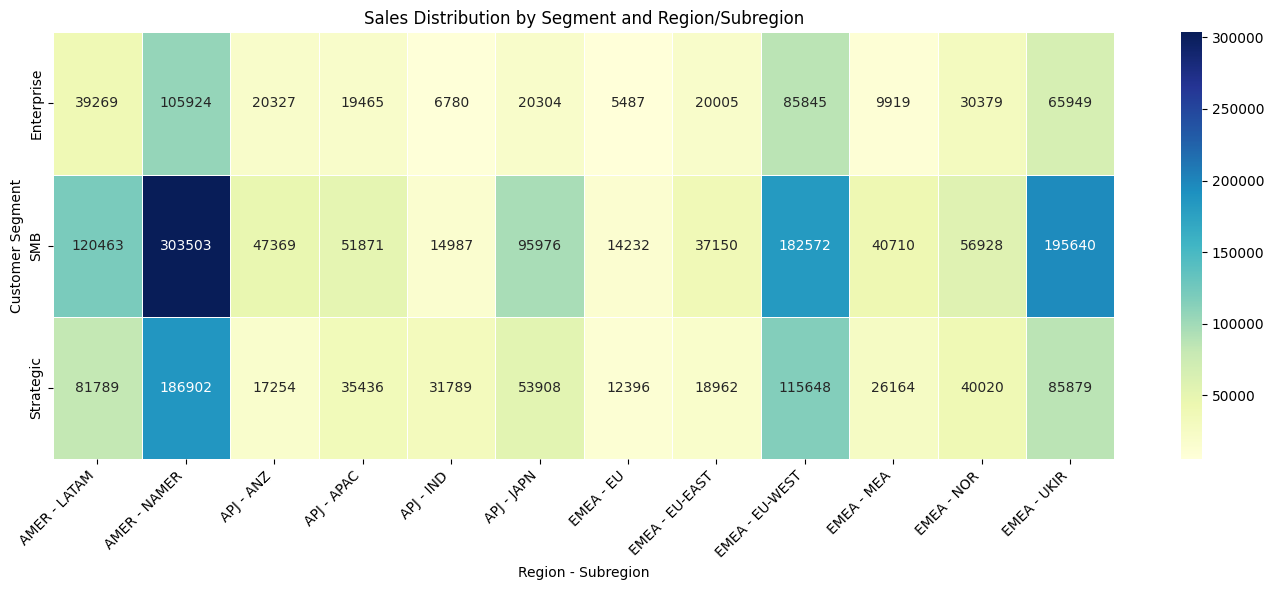

In [13]:
# Group and sum sales by region, subregion and segment
summary = df.groupby(['region', 'subregion', 'segment'], as_index= False)['sales'].sum()

# Create a combined location field for better visualization
summary['location'] = summary['region'] + ' - ' + summary['subregion']

# Pivot table for heatmap
heatmap_data = summary.pivot_table(
    index='segment',
    columns='location',
    values='sales',
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title('Sales Distribution by Segment and Region/Subregion')
plt.xlabel('Region - Subregion')
plt.ylabel('Customer Segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 ### Insights & Recommendations :
1. Strategic Segment shows a strong presence particularly in AMER - NAMER.
2. Enterprise Segment trails behind in comparison across most regions.

- Focus on SMB Growth: Since SMB consistently drives high sales across multiple subregions, this segment presents a robust opportunity. Tailoring products or support for SMB needs could scale revenue further.
- Leverage Strategic Segment in North America: Given its success in AMER - NAMER, expanding Strategic offerings there could be fruitful.
- Explore Underperforming Regions: Regions like APJ - JAPN and EMEA - NOR show lighter sales intensity. Investigating local barriers or adjusting go-to-market strategies might unlock new revenue.


### 2. Which regions and subregions contribute most to total sales across different customer segments?

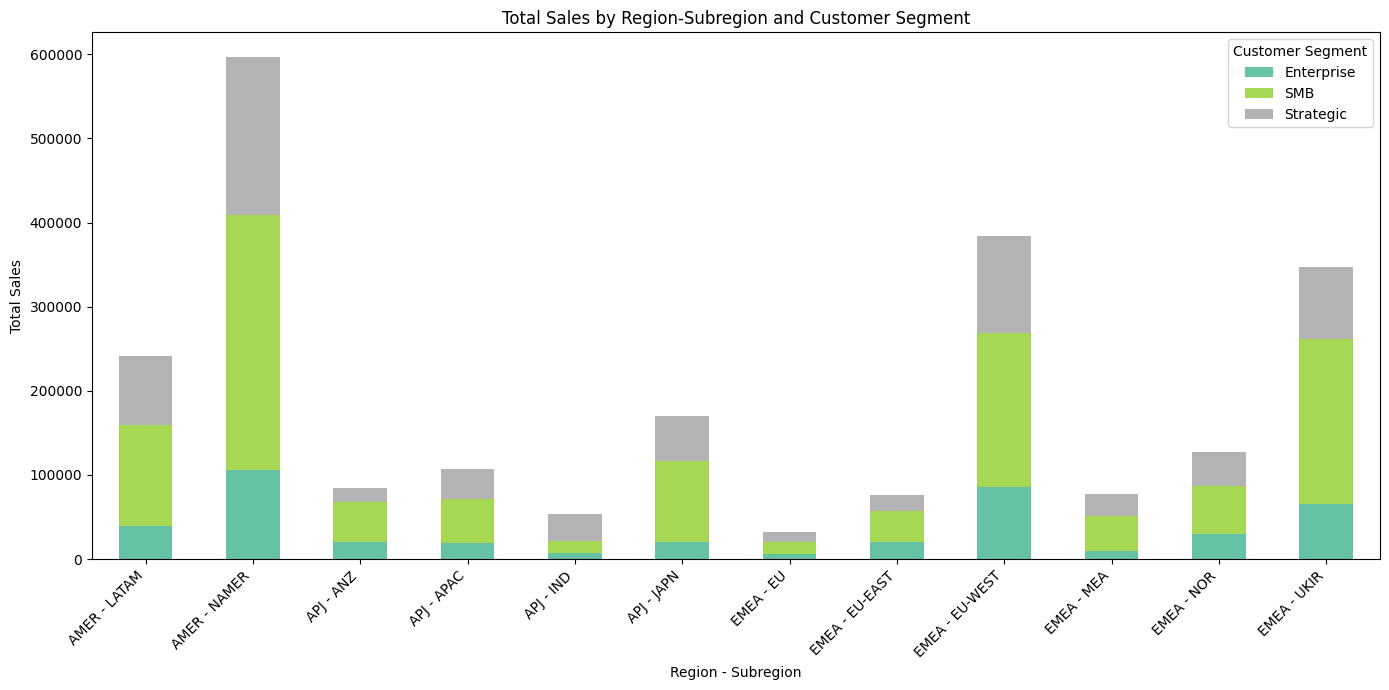

In [14]:
# Create a combined location column for clearer labeling
df['location'] = df['region'] + ' - ' + df['subregion']

# Group and aggregate sales
sales_summary = df.groupby(['location', 'segment'], as_index=False)['sales'].sum()

# Pivot for plotting
pivot_table = sales_summary.pivot(index='location', columns='segment', values='sales').fillna(0)

# Plotting stacked bar chart
pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set2'
)

plt.title('Total Sales by Region-Subregion and Customer Segment')
plt.xlabel('Region - Subregion')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


### Insights and recommendations :
1. SMB Segment: Dominates in almost every high-performing region, major revenue engine.
2. Strategic Segment: Particularly potent in NAMER and EU-WEST, amplifying total impact.
3. Enterprise Segment: While less dominant overall, it still boosts total sales in select areas like UKR and JAPN.
- Double Down on AMER - NAMER: It's your global cash cow. Optimize marketing and account expansion strategies to reinforce dominance across all segments.
- Strengthen EMEA - EU-WEST & UKR: These regions show versatile segment success, ideal for piloting multi-segment initiatives or tailored product bundles.
- Elevate SMB Across APJ: Given SMB’s traction even in traditionally lower-sales subregions, localized campaigns targeting SMBs might unlock untapped growth.



### 3. Which industries and segments are most sensitive to discounts, based on changes in sales and quantity?

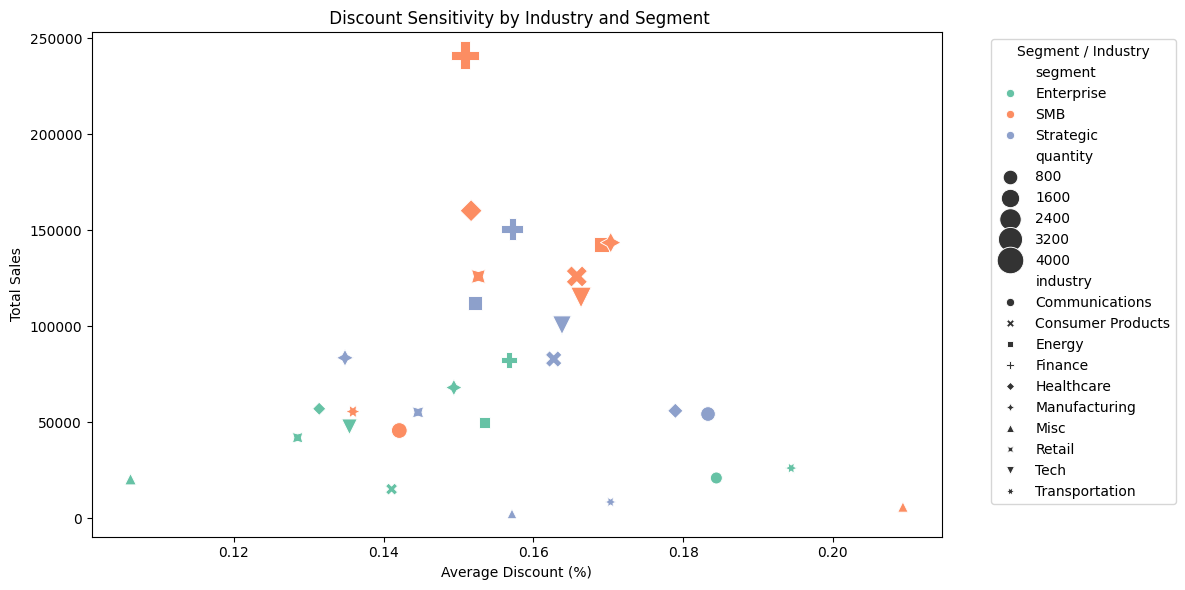

In [15]:
# Group data to summarize behavior
summary = df.groupby(['industry', 'segment'], as_index=False).agg({
    'discount': 'mean',
    'sales': 'sum',
    'quantity': 'sum'
})

# Visualize with scatterplot (discount sensitivity)
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=summary,
    x='discount',
    y='sales',
    hue='segment',
    style='industry',
    size='quantity',
    sizes=(50, 400),
    palette='Set2',
    legend='brief'
)

# Enhance the chart
plt.title(' Discount Sensitivity by Industry and Segment')
plt.xlabel('Average Discount (%)')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Segment / Industry')
plt.tight_layout()
plt.show()


### Insights and recommendations :
These industries are showing big movement when discounts are applied, especially within the SMB and Strategic segments.
- Target SMBs with Tailored Discounts: Particularly in Communications and Consumer Products, SMB customers are highly reactive to price cuts. Consider seasonal campaigns, bundle offers, or volume-based pricing for maximum lift.
- Strategic Play in Healthcare: Customers here might respond well to tiered discount structures based on commitment levels, longer-term contracts or subscription plans.
- Test Elasticity in Other Segments: Enterprise buyers appear less sensitive overall. You may want to test other value drivers, like service level upgrades or loyalty perks rather than aggressive pricing.



### 4. Which customer segments receive the highest average discounts, and do they correspond to higher or lower sales volumes?

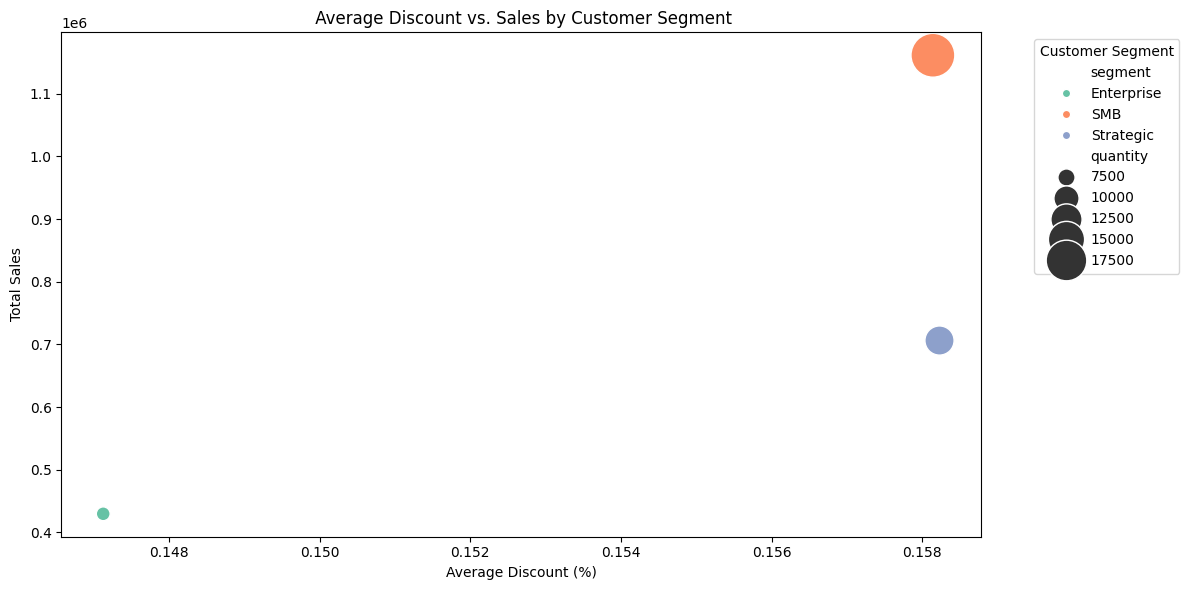

In [16]:
# Group by segment to calculate metrics
segment_stats = df.groupby('segment', as_index=False).agg({
    'discount': 'mean',    
    'sales': 'sum',       
    'quantity': 'sum'      
})

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=segment_stats,
    x='discount',
    y='sales',
    size='quantity',
    hue='segment',
    sizes=(100, 1000),
    palette='Set2',
    legend='brief'
)

# Enhance plot readability
plt.title(' Average Discount vs. Sales by Customer Segment')
plt.xlabel('Average Discount (%)')
plt.ylabel('Total Sales')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights and recommendations :

- SMB Drives Volume with Hefty Discounts
This segment not only gets the highest average discount but also converts it into the highest sales and quantity. Discounts here are clearly profit accelerators, suggesting high price elasticity.
- Strategic Plays the Middle Ground
Moderate discounts yield strong but not top-tier sales. There’s potential to experiment with deeper pricing strategies or loyalty perks to push Strategic sales higher.
- Enterprise: Low Discount, Low Sales
This segment seems resistant to traditional discounts. Instead of price-based incentives, explore value-based strategies like premium service packages, long-term engagements, or exclusive offerings.

Discounts aren’t just about pricing, they’re strategic levers. SMB is discount-hungry and reward-rich. Strategic might respond to smarter bundling. Enterprise may need a completely different playbook.

### 5. Is there a correlation between discount rates and sales volume across cities or industries?

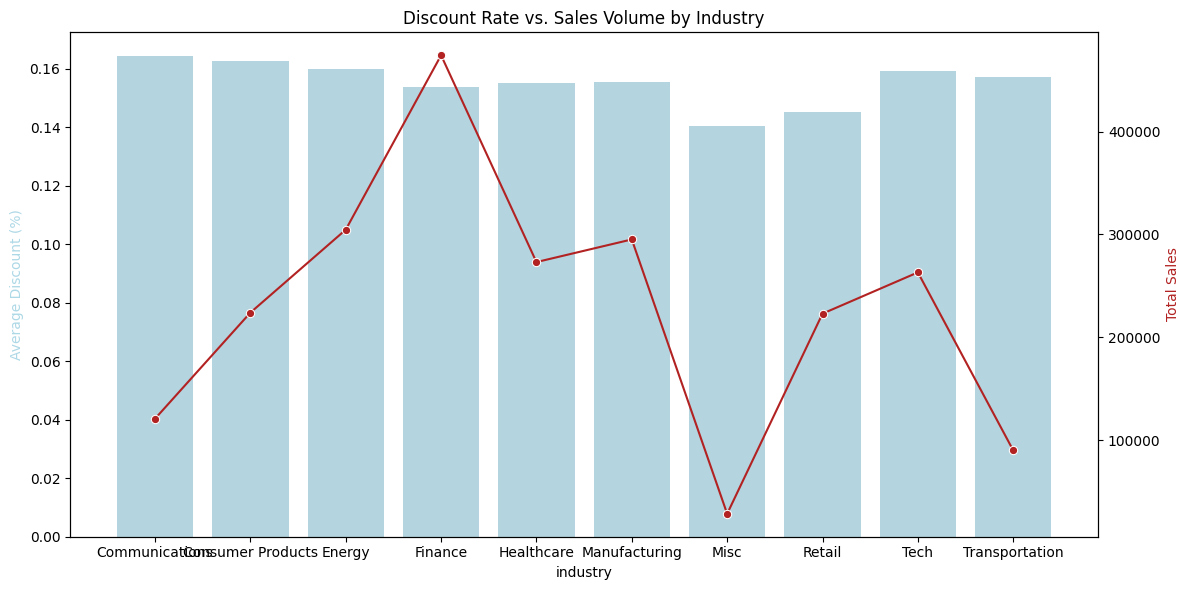

In [17]:
# Aggregate by industry
industry_stats = df.groupby('industry', as_index=False).agg({
    'discount': 'mean',
    'sales': 'sum'
})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average discount
sns.barplot(data=industry_stats, x='industry', y='discount', color='lightblue', ax=ax1)
ax1.set_ylabel('Average Discount (%)', color='lightblue')
ax1.set_title('Discount Rate vs. Sales Volume by Industry')

# Add a line plot for total sales on a second axis
ax2 = ax1.twinx()
sns.lineplot(data=industry_stats, x='industry', y='sales', color='firebrick', marker='o', ax=ax2)
ax2.set_ylabel('Total Sales', color='firebrick')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Calculate correlation per industry
"""To calculate correlation per industry and display the result"""

correlations = df_cleaned.groupby('industry')[['discount', 'sales']].corr().iloc[0::2,-1].reset_index()
correlations.columns = ['industry', '_', 'correlation']
print("🔢 Correlation between discount and sales per industry:")
print(correlations.sort_values(by='correlation', ascending=False))

🔢 Correlation between discount and sales per industry:
            industry         _  correlation
4         Healthcare  discount     0.011912
9     Transportation  discount     0.002923
8               Tech  discount    -0.011323
3            Finance  discount    -0.017012
5      Manufacturing  discount    -0.028994
7             Retail  discount    -0.029788
1  Consumer Products  discount    -0.057629
0     Communications  discount    -0.059055
2             Energy  discount    -0.067745
6               Misc  discount    -0.128152


### Insights and recommendations :
No Strong Correlation Detected
The relationship between discount rates and sales volume is inconsistent across industries—some industries show elevated discount rates with low sales, while others achieve high sales with minimal discounts.
Examples:
- Finance: High discount rate, but relatively low sales volume
- Retail: Low discount rate, yet among the highest in sales volume
- Healthcare: Balanced discounting with moderate sales
- Transportation & Tech: Both show moderate sales but different discount behaviors

Insights :
- Price Isn’t Everything: High discounts don't necessarily drive high sales—especially in industries like Finance, suggesting that other factors (e.g., trust, product value, regulations) may weigh heavier.
- Value-Driven Sectors Thrive: Industries like Retail succeed with minimal discounting, implying a strong baseline demand or well-optimized pricing strategy.
- Strategize Differently by Industry: Discount elasticity varies—what works in Communications may flop in Energy.

Recommendations
- Segmented Discount Strategy: Avoid uniform discount policies. Tailor discounting tactics per industry based on observed responsiveness.
- Boost Non-Price Value: For industries with weak discount-sales correlation, invest in product differentiation, brand loyalty, or service enhancements.
- Test Regional Elasticity: A similar analysis by city could uncover local sensitivities to pricing that aren’t visible at the industry level.

### 6. Do certain industries show stronger performance in specific subregions?

<Figure size 1400x600 with 0 Axes>

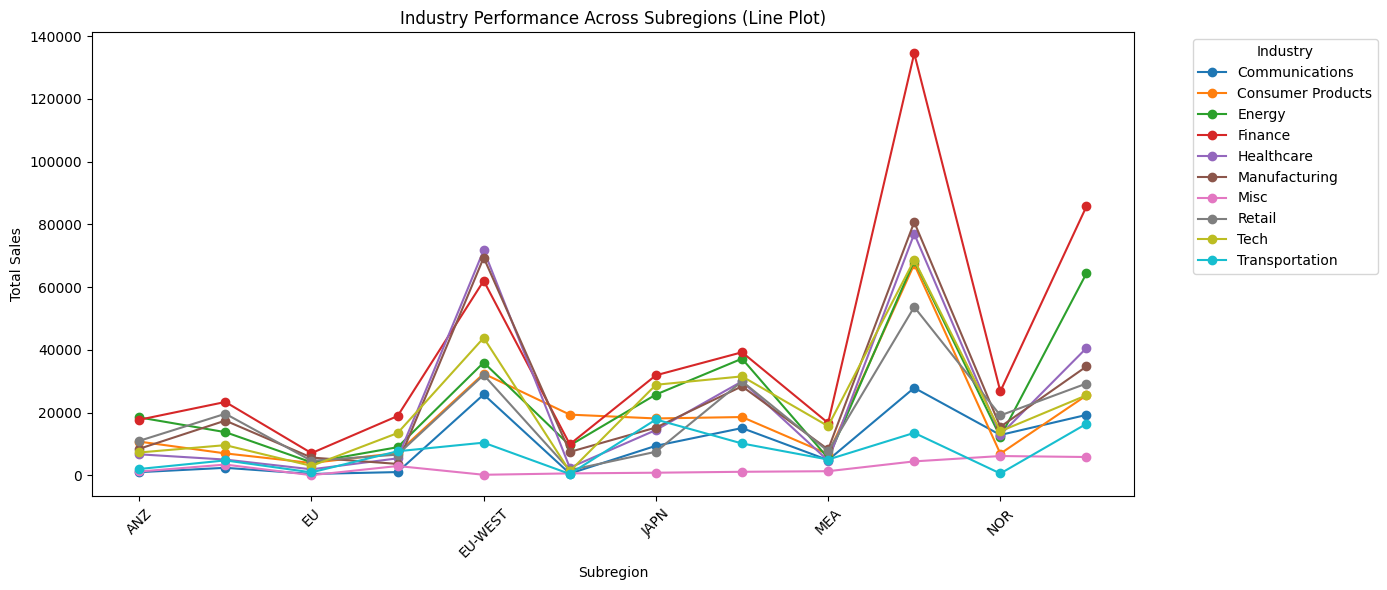

In [19]:
# Group and sum sales
summary = df.groupby(['subregion', 'industry'], as_index=False)['sales'].sum()

# Pivot for plotting
pivot_data = summary.pivot(index='subregion', columns='industry', values='sales').fillna(0)

# Plotting line chart
plt.figure(figsize=(14,6))
pivot_data.plot(kind='line', marker='o', figsize=(14,6))
plt.title('Industry Performance Across Subregions (Line Plot)')
plt.xlabel('Subregion')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights and recommendations :
- Double Down on NOR: With Energy and Finance showing explosive sales here, it’s worth exploring tailored offerings or regional partnerships to amplify momentum.
- Tech in EU-WEST: Ideal place to test cutting-edge initiatives, product launches, or strategic investments in digital services.
- Localize Strategy for JAPN & MEA: Healthcare and Transportation exhibit regional stability—targeted campaigns or service enhancements could unlock latent demand.
- Monitor Underperformers in ANZ: Lower sales across industries suggest a need for deeper market research or reevaluation of product-market fit



## CONCLUSION
### Sales, Segments & Discount Patterns

### 1. Top Performing Segments
- SMB segment reigns supreme across most regions, especially in NAMER and EU-WEST, with both the highest sales volume and strong responsiveness to discounts.
- Strategic segment follows closely, especially strong in Healthcare, UKR, and NAMER.
### 2. Regional & Subregional Performance
- AMER - NAMER: Consistently contributes the highest total sales across all segments—your sales powerhouse.
- EU-WEST & UKR: Strategic and SMB segments thrive here; strong potential for diversified expansion.
- NOR stands out with explosive sales in Energy and Finance—indicating geographic-industrial hotspots.
### 3. Discount Behavior
- SMBs are highly discount-sensitive, converting deeper discounts into significantly higher sales and volume.
- Strategic buyers in Healthcare 
### 4. Industry Dynamics
- There’s no consistent correlation between discount rates and sales across industries.
- Retail shines with low discounts and high sales.
- Finance sees high discounting but low sales—hinting at non-price demand drivers.
### 5. Subregion-Industry Alignment
- Industries like Tech (EU-WEST), Energy & Finance (NOR), and Healthcare (JAPN & MEA) show subregional specialization that should inform localized strategies.



## Final thoughts and Recommendation :
### 1. Double Down on SMB in NAMER & EU-WEST
- They’re discount-hungry and yield high returns.
- Optimize pricing models, loyalty programs, and streamlined onboarding for SMBs in these regions.
### 2. Localize Industry Strategy for NOR & JAPN
- Offer custom financial products and energy solutions in NOR.
- Boost Healthcare innovation in JAPN through strategic partnerships or tailored solutions.
### 3. Diversify Offers for Strategic Buyers
- Experiment with tiered pricing and bundled services—especially in Healthcare and UKR.
- Integrate contract incentives to deepen commitment.
### 4. Avoid Blanket Discounting
- Apply discount models selectively—Retail proves that less can be more.
- Tailor pricing elasticity models per industry and subregion for optimal impact.
### 5. Test Enterprise Engagement Models
- Since they're not price-sensitive, explore premium service upgrades, concierge support, or exclusive access benefits
